In [1]:
import os

import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from process_csv import csv_2np, dataset

### Primero armo el dataset a partir de los precios de BTC desde 08/10/2015.

In [2]:
directory = "./Minute_BTC"
n_steps = 60
n_predictions = 10
data = csv_2np(directory, n_steps, n_predictions)
series, X, Y = dataset(data, n_steps=n_steps, n_predictions=n_predictions)

### El dataset ya está mezclado de forma aleatoria. Cada entrada son n_steps muestras y cada salida son n_steps * n_predictions muestras. Por cada muestra de entrada hay una predicción de 10 muestras al futuro. Es decir, para la primer muestra de entrada se tienen las 10 siguientes como salida. Esto está hecho así para aumentar el rendimiento de la red neuronal, sin embargo, la salida que se utiliza realmente para comparar con la predicción son las n_predictions muestras pertenecientes a la última muestra de entrada 

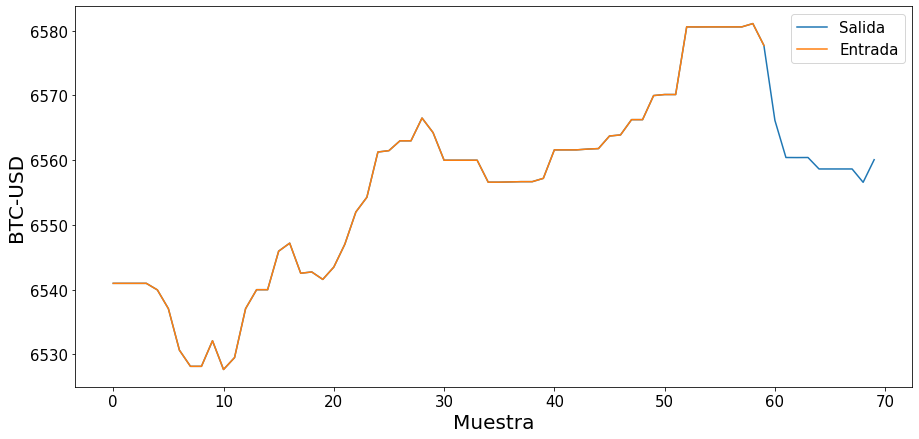

In [11]:
plt.figure(1, figsize=(15,7));
to_plot = np.concatenate((X[0,:,0],Y[0,59,:]))
plt.plot(to_plot, label='Salida')
plt.plot(range(0,n_steps),X[0,:,0], label='Entrada');
plt.xlabel('Muestra', fontsize=20);
plt.ylabel('BTC-USD', fontsize=20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(fontsize=15);
